Scikit-learn, often abbreviated as sklearn, is a popular machine learning library in Python. It provides a wide array of tools for tasks such as classification, regression, clustering, dimensionality reduction, and more. Sklearn is built on top of other scientific libraries in Python, such as NumPy, SciPy, and matplotlib, and it integrates well with the broader Python ecosystem.



Scikit-learn's linear models module provides implementations of various linear models for tasks such as regression and classification. These models are widely used in machine learning due to their simplicity, interpretability, and effectiveness in many scenarios. Here are some of the key linear models available in scikit-learn:

### Import modules

https://towardsdatascience.com/bias-variance-and-regularization-in-linear-regression-lasso-ridge-and-elastic-net-8bf81991d0c5

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set_style("darkgrid")

### Import Dataset

In [2]:
# boston = datasets.load_boston()
# boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [3]:
boston = datasets.fetch_california_housing()
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [4]:
boston_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Create random noise matrix and final data matrix

In [5]:
n_houses = boston_df.shape[0]
rand_noise = np.random.rand(n_houses, 5)

rand_noise_df = pd.DataFrame(data=rand_noise, columns=['Noise_1', 'Noise_2', 'Noise_3', 'Noise_4', 'Noise_5'])
X = pd.concat([boston_df, rand_noise_df], axis=1)
y = boston['target']

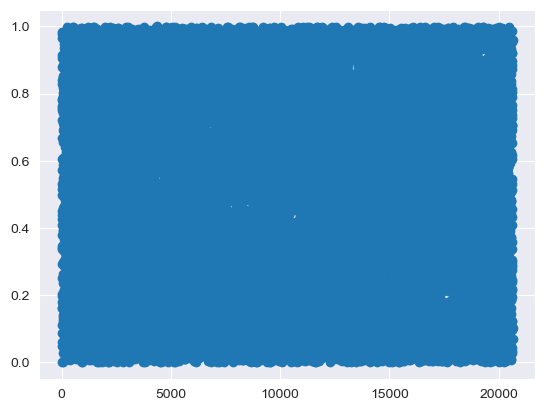

In [6]:
plt.scatter(np.arange(n_houses),rand_noise[:,0])

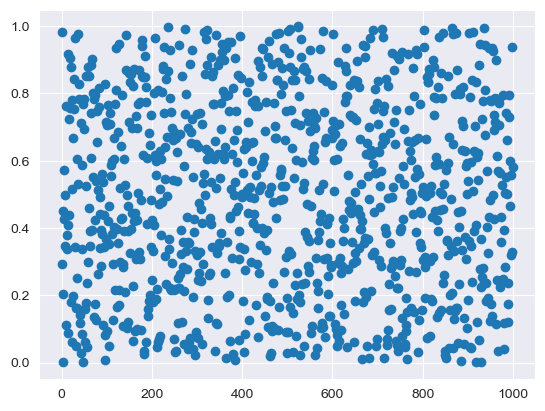

In [7]:
plt.scatter(np.arange(1000),rand_noise[:1000,0])

### Create Models

In [8]:
boston_lr = LinearRegression()
boston_ls = Lasso(alpha=0.1)
boston_rg = Ridge(alpha=0.1)
boston_en = ElasticNet(alpha=0.1)
models = [(boston_lr, 'Linear Regression'),
           (boston_ls, 'Lasso'),
           (boston_rg, "Ridge Regression"),
           (boston_en, "Elastic Net")]

### Scale data

In [36]:
boston_ss = StandardScaler()
X_scaled = boston_ss.fit_transform(X=X)



(array([ 719., 1104., 2235., 2681., 2510., 2354., 3555., 1900., 1616.,
        1966.]),
 array([-2.19618048, -1.79094428, -1.38570808, -0.98047188, -0.57523568,
        -0.16999948,  0.23523672,  0.64047292,  1.04570912,  1.45094532,
         1.85618152]),
 <BarContainer object of 10 artists>)

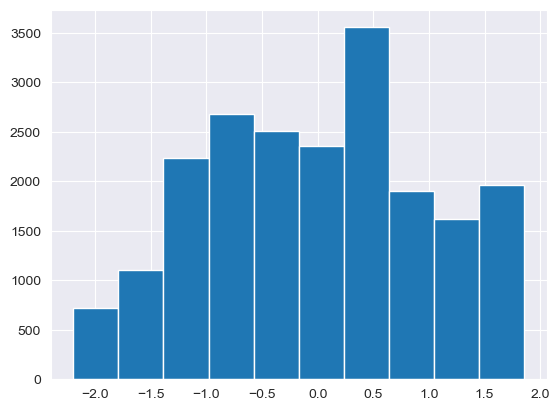

In [37]:
plt.hist(X_scaled[:,1])

(array([ 719., 1104., 2235., 2681., 2510., 2354., 3555., 1900., 1616.,
        1966.]),
 array([ 1. ,  6.1, 11.2, 16.3, 21.4, 26.5, 31.6, 36.7, 41.8, 46.9, 52. ]),
 <BarContainer object of 10 artists>)

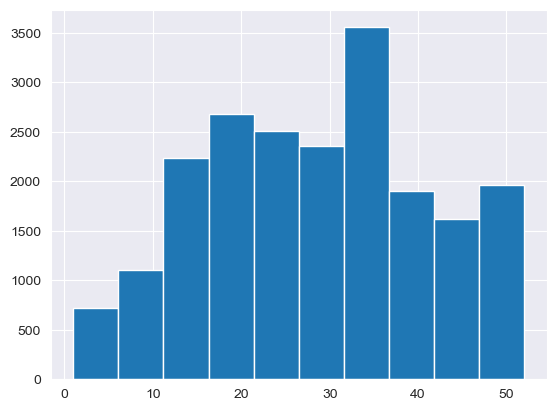

In [38]:
plt.hist(X.values[:,1])

### Split into train/validation

In [39]:
X_train, X_validation, y_train, y_validation = train_test_split(X_scaled, y, test_size=0.25, random_state=235)

In [40]:
print(f'Training % is : {len(X_train)/(len(X_train) + len(X_validation))*100}')
print(f'Validation % is : {len(X_validation)/(len(X_train) + len(X_validation))*100}')

Training % is : 75.0
Validation % is : 25.0


### Fit models and graph coefficients

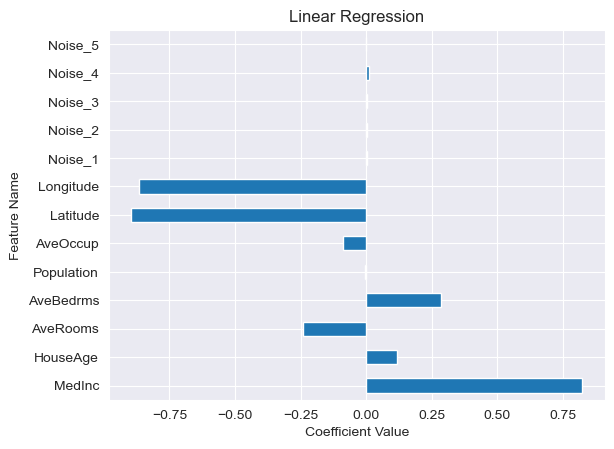

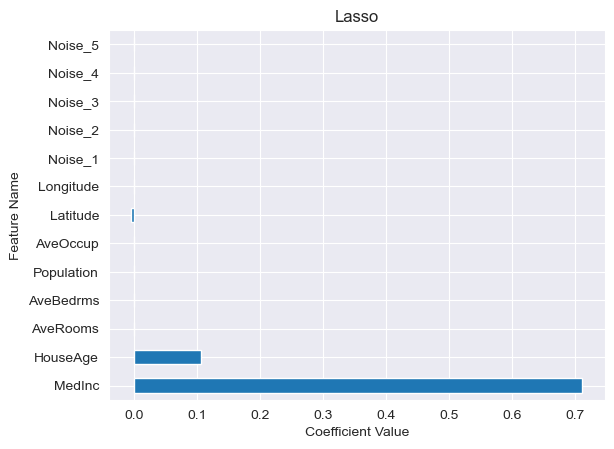

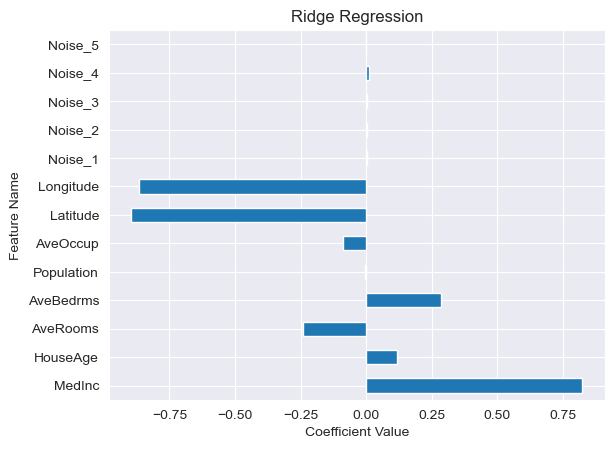

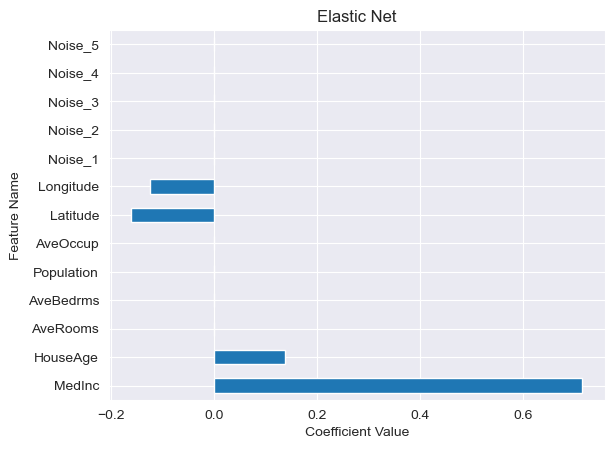

In [41]:
for model in models:
    model[0].fit(X_train, y_train)
    pd.Series(model[0].coef_, 
              index=X.columns).plot(kind='barh')
    plt.title(model[1])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Name')
    plt.show()
    

### Get model scores

In [42]:
for model in models:
    mse = mean_squared_error(model[0].predict(X_validation), y_validation)
    print(f"Mean Squared Error of {model[1]}: {mse:.2f}")

Mean Squared Error of Linear Regression: 0.56
Mean Squared Error of Lasso: 0.71
Mean Squared Error of Ridge Regression: 0.56
Mean Squared Error of Elastic Net: 0.67


### QC

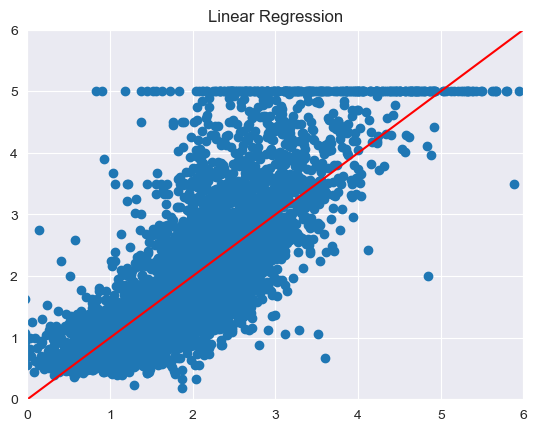

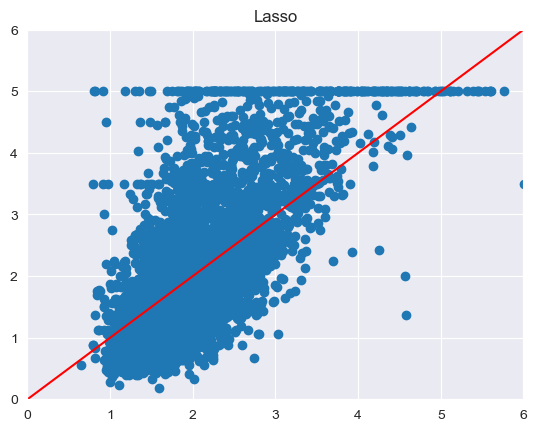

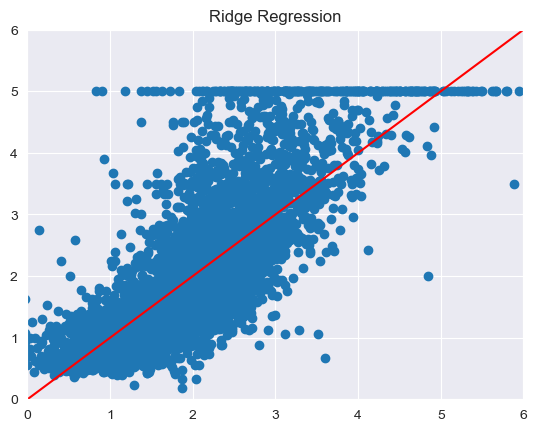

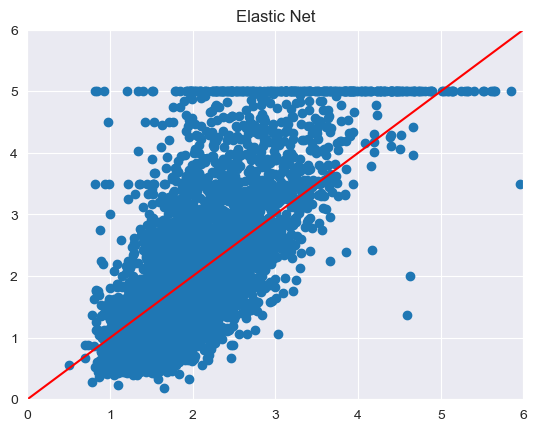

<Figure size 640x480 with 0 Axes>

In [43]:
for model in models:
    model[0].predict(X_validation), y_validation
    plt.scatter(model[0].predict(X_validation),y_validation)
    plt.xlim([0,6])
    plt.ylim([0,6])
    plt.title(model[1])

    plt.plot([0,6],[0,6],'r')

    plt.figure()


### Hyperparameters

In [44]:
alphas = np.arange(0,10)/10.0
errors_validation = []
for alpha in alphas:
    boston_en = ElasticNet(alpha=alpha)
    boston_en.fit(X_train, y_train)
    mse = mean_squared_error(boston_en.predict(X_validation), y_validation)
    errors_validation.append(mse)
    

c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.989e+03, tolerance: 2.052e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_d

Text(0.5, 0, 'Alpha')

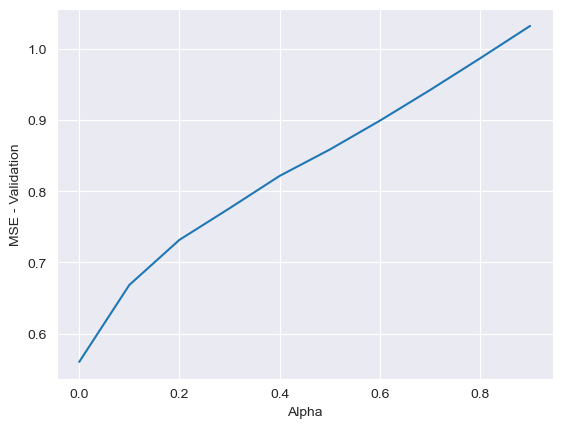

In [45]:
plt.plot(alphas,errors_validation)
plt.ylabel('MSE - Validation')
plt.xlabel('Alpha')